In [10]:
import os 
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import *
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_set ='PlantDiseaseData-master/PlantDiseaseData-master/Train'
test_set='PlantDiseaseData-master/PlantDiseaseData-master/Test'

In [12]:
num_classes=len(glob.glob(train_set+"/*")) 
print(num_classes,"Classes")

21 Classes


In [13]:
my_train_data = ImageDataGenerator( rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True )
my_test_data=ImageDataGenerator(rescale=1./255)

In [14]:
input_shape=(224,224,3)
train_generator = my_train_data.flow_from_directory(train_set,target_size=(224,224),batch_size=32)
test_generator= my_test_data.flow_from_directory(test_set,shuffle=True,target_size=(224,224),batch_size=32)

Found 21818 images belonging to 21 classes.
Found 5475 images belonging to 21 classes.


In [15]:
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array 
from keras.models import load_model

In [16]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu',name="conv2d_1"))
model.add(MaxPooling2D(pool_size=(3, 3),name="max_pooling2d_1"))
model.add(Conv2D(32, (3, 3),activation='relu',name="conv2d_2"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_2"))
model.add(Conv2D(64, (3, 3),activation='relu',name="conv2d_3"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_3"))   
model.add(Flatten(name="flatten_1"))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)      

In [17]:
valid_gen = my_train_data.flow_from_directory(
                       test_set,
                       target_size=(224, 224),
                       batch_size=32)

Found 5475 images belonging to 21 classes.


In [18]:
loaded_model = load_model("saved_model.h5")

In [19]:
# model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
# history = model.fit(
#     train_generator,
#     steps_per_epoch=None,
#     epochs=7,
#     validation_data=valid_gen,
#     validation_steps=None,
#     verbose=1,
#     callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
#     shuffle=True
#     )
     

In [20]:
# print("[INFO] Calculating model accuracy")
# scores = loaded_model.evaluate(valid_gen)
# print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
172/172 [==============================] - 102s 590ms/step - loss: 0.2242 - accuracy: 0.9246
Test Accuracy: 92.45662093162537


In [21]:
# model.save("saved_model.h5")

1/1 [==============================] - 0s 114ms/step
Tomato___Bacterial_spot


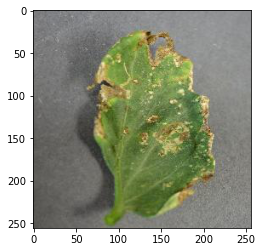

In [22]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='0b13b997-9957-4029-b2a4-ef4a046eb088___UF.GRC_BS_Lab Leaf 0595.JPG'
result_cnn = loaded_model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 27ms/step
Apple___Apple_scab


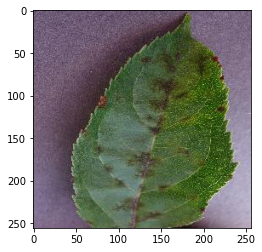

In [24]:
classes = list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='1a41bab0-45e0-4dda-a798-9bf4a998f1b6___FREC_Scab 3450.JPG'
result_cnn = loaded_model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 27ms/step
Potato___Late_blight


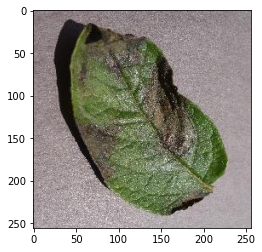

In [25]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='0f243024-b1fa-4f96-ac7e-ecaf6dc5bc37___RS_LB 4925.JPG'
result_cnn = loaded_model.predict([prepare(img_url)])
disease = image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 26ms/step
Corn_(maize)___Common_rust_


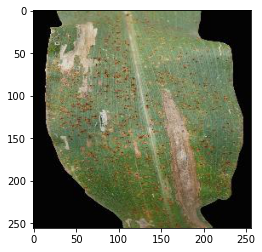

In [26]:
classes=list(train_generator.class_indices.keys())
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='RS_Rust 1565.JPG'

result_cnn = loaded_model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 30ms/step
Apple___healthy


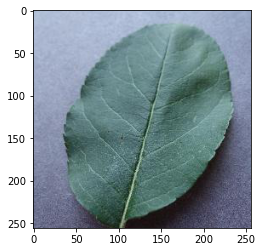

In [27]:
classes=list(train_generator.class_indices.keys())
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='0e857e3d-34ff-4549-b8ef-4d699aacb178___RS_HL 7511.JPG'

result_cnn = loaded_model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])